In [ ]:
# Evaluate clustering performance using Silhouette Coefficient
# The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
# Scores around zero indicate overlapping clusters.
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster

# Evaluate clustering performance using Calinski-Harabasz Index
# where a higher Calinski-Harabasz score relates to a model with better defined clusters

# Evaluate clustering performance using Davies-Bouldin Index
# This index signifies the average ‘similarity’ between clusters,
# where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.
# Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from utils import *

In [2]:
# Load the dataset
biomass_data = pd.read_csv('site_data.csv')

In [3]:
#Clustering products

# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop rows with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
# Impute missing values with ROW mean (must use transposed df and axis=1 for rows)
data_imputed = data_transposed_numeric.T.fillna(data_transposed_numeric.mean(axis=1)).T

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

## Hierarchical

n_clusters = 2
biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 0 contains multiple products, plotting heatmap...


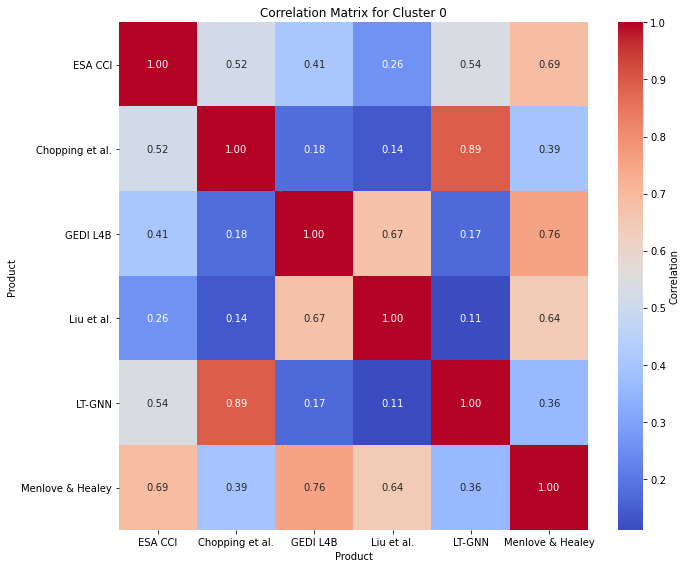

Silhouette Coefficient: 0.29395706618780454
Calinski-Harabasz Index: 3.1312681115521466
Davies-Bouldin Index: 0.4714718004761889
---
n_clusters = 3
biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 2 contains multiple products, plotting heatmap...
Cluster 0 contains multiple products, plotting heatmap...


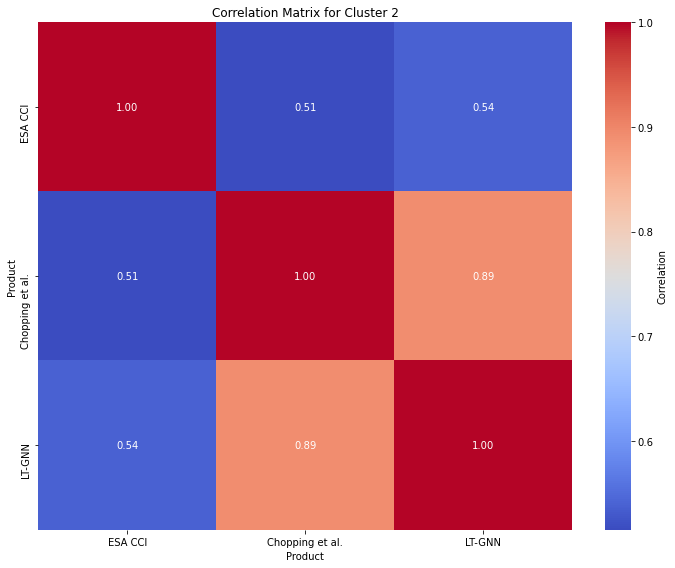

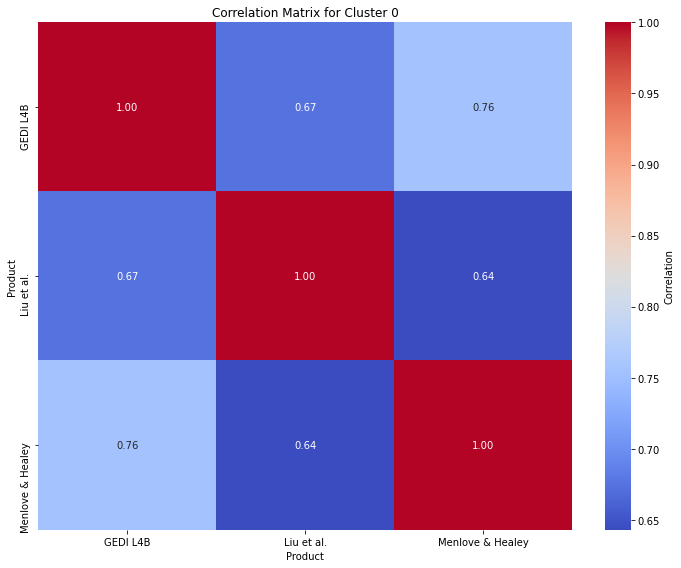

Silhouette Coefficient: 0.22890319328004938
Calinski-Harabasz Index: 4.119086607194342
Davies-Bouldin Index: 0.8237222880542179
---
n_clusters = 4
biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 0 contains multiple products, plotting heatmap...
Cluster 2 contains multiple products, plotting heatmap...


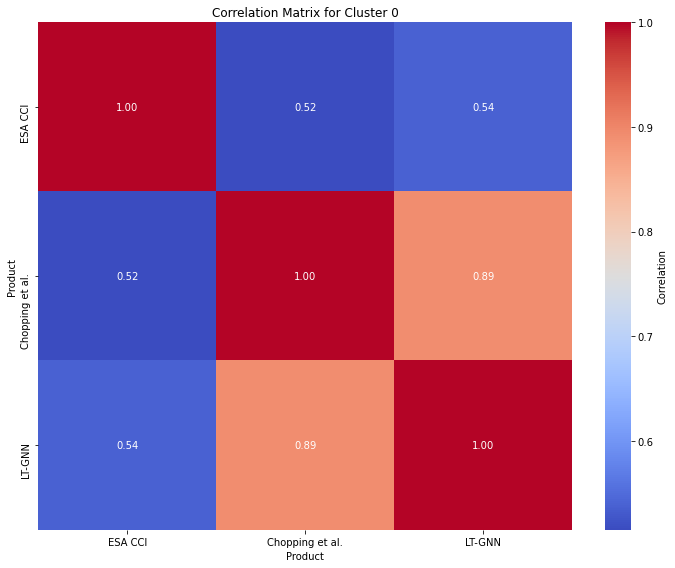

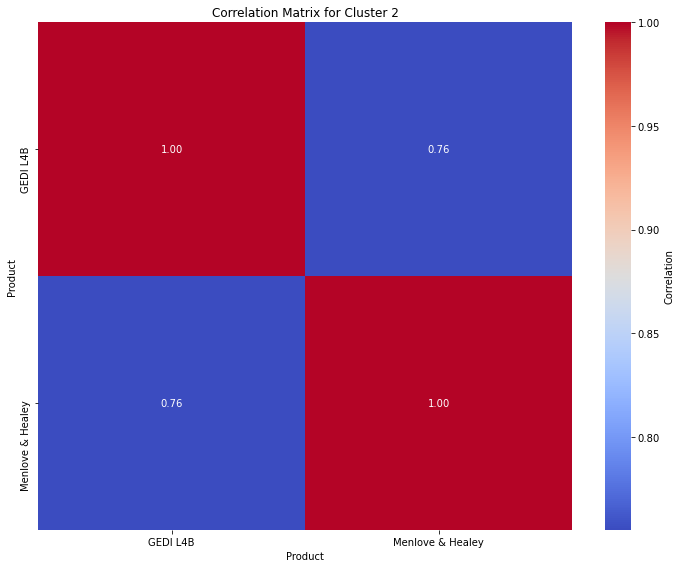

Silhouette Coefficient: 0.18373793306308267
Calinski-Harabasz Index: 3.8420795587584706
Davies-Bouldin Index: 0.6348688205181529
---
n_clusters = 5
biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 2 contains multiple products, plotting heatmap...
Cluster 0 contains multiple products, plotting heatmap...


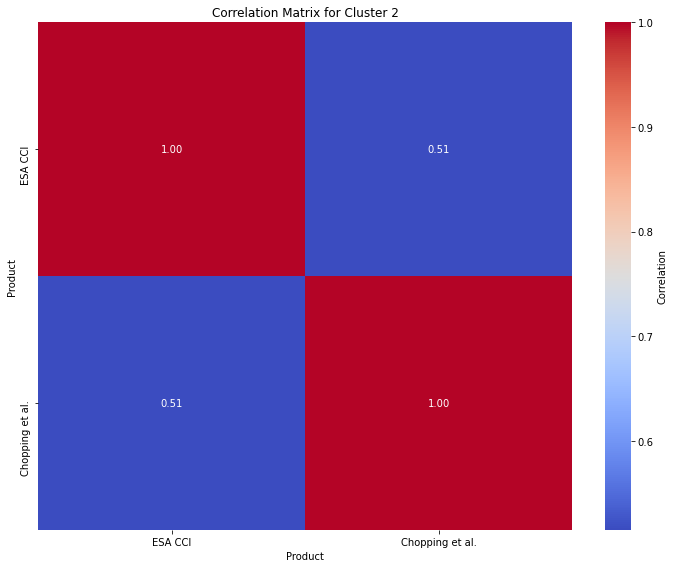

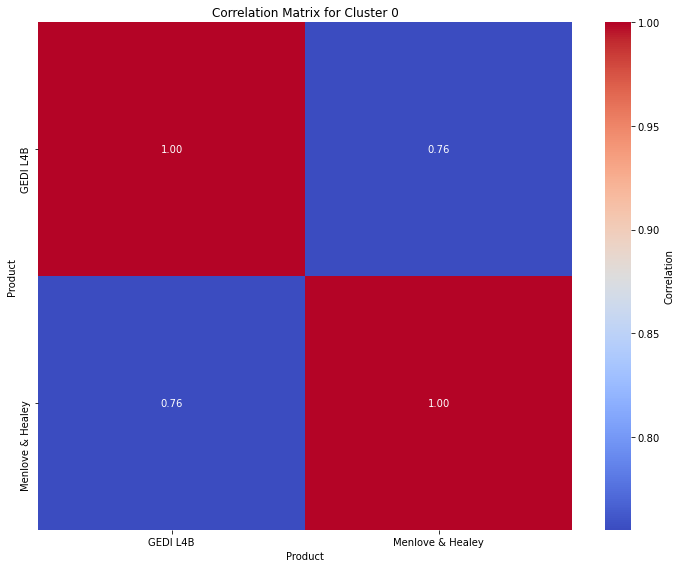

Silhouette Coefficient: 0.14337683231987178
Calinski-Harabasz Index: 4.049430648681312
Davies-Bouldin Index: 0.5097690918990825
---
n_clusters = 6
biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 0 contains multiple products, plotting heatmap...


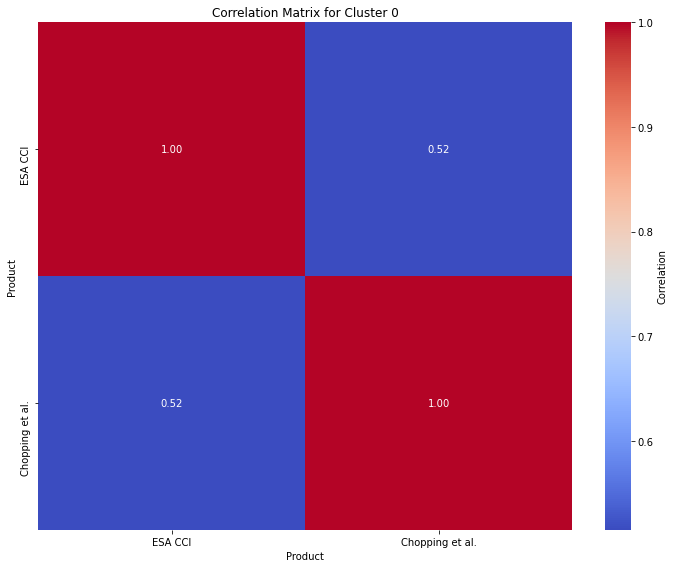

Silhouette Coefficient: 0.12121869867301863
Calinski-Harabasz Index: 7.449776890719024
Davies-Bouldin Index: 0.23989603684699953
---


In [10]:
for n_clusters in range(2, 7):
    print(f"n_clusters = {n_clusters}")
    
    # Hierarchical clustering
    cluster_h = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters_h = cluster_h.fit_predict(data_scaled)
    
    # Add cluster labels to the transposed DataFrame
    data_imputed.loc[:,'cluster'] = clusters_h
    
    # Transpose the data back to the original format
    biomass_data_clustered_h = data_imputed.reset_index()
    
    # List of products
    products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']
    corr_matrix = plot_heat_by_clus(biomass_data_clustered_h, products)
    
    # METRICS
    # Extract predicted cluster labels
    predicted_labels = biomass_data_clustered_h['cluster']
    print_indices(data_scaled, predicted_labels)
    
    print("---")

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Initialize variables to store the best results
best_n_clusters = 0
best_silhouette = -1.0
best_calinski_harabasz = -1.0
best_davies_bouldin = float('inf')

for n_clusters in range(2, 7):  # Start from 2 clusters
    print(f"n_clusters = {n_clusters}")
    
    # Hierarchical clustering
    cluster_h = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters_h = cluster_h.fit_predict(data_scaled)
    
    # Compute evaluation metrics
    silhouette = silhouette_score(data_scaled, clusters_h)
    calinski_harabasz = calinski_harabasz_score(data_scaled, clusters_h)
    davies_bouldin = davies_bouldin_score(data_scaled, clusters_h)
    
    print(f"Silhouette Index: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    # Update the best results if the current metrics are better
    if (silhouette > best_silhouette) and (calinski_harabasz > best_calinski_harabasz) and (davies_bouldin < best_davies_bouldin):
        best_n_clusters = n_clusters
        best_silhouette = silhouette
        best_calinski_harabasz = calinski_harabasz
        best_davies_bouldin = davies_bouldin
    
    print("---")

print(f"Optimal n_clusters: {best_n_clusters}")
print(f"Best Silhouette Index: {best_silhouette:.4f}")
print(f"Best Calinski-Harabasz Index: {best_calinski_harabasz:.4f}")
print(f"Best Davies-Bouldin Index: {best_davies_bouldin:.4f}")

n_clusters = 2
Silhouette Index: 0.2940
Calinski-Harabasz Index: 3.1313
Davies-Bouldin Index: 0.4715
---
n_clusters = 3
Silhouette Index: 0.2289
Calinski-Harabasz Index: 4.1191
Davies-Bouldin Index: 0.8237
---
n_clusters = 4
Silhouette Index: 0.1837
Calinski-Harabasz Index: 3.8421
Davies-Bouldin Index: 0.6349
---
n_clusters = 5
Silhouette Index: 0.1434
Calinski-Harabasz Index: 4.0494
Davies-Bouldin Index: 0.5098
---
n_clusters = 6
Silhouette Index: 0.1212
Calinski-Harabasz Index: 7.4498
Davies-Bouldin Index: 0.2399
---
Optimal n_clusters: 2
Best Silhouette Index: 0.2940
Best Calinski-Harabasz Index: 3.1313
Best Davies-Bouldin Index: 0.4715


In [24]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Initialize variables to store the best results for each index
best_n_silhouette = 0
best_silhouette = -1.0

best_n_calinski_harabasz = 0
best_calinski_harabasz = -1.0

best_n_davies_bouldin = 0
best_davies_bouldin = float('inf')

for n_clusters in range(2, 7):  # Start from 2 clusters
    print(f"n_clusters = {n_clusters}")
    
    # Hierarchical clustering
    cluster_h = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters_h = cluster_h.fit_predict(data_scaled)
    
    # Compute evaluation metrics
    silhouette = silhouette_score(data_scaled, clusters_h)
    calinski_harabasz = calinski_harabasz_score(data_scaled, clusters_h)
    davies_bouldin = davies_bouldin_score(data_scaled, clusters_h)
    
    print(f"Silhouette Index: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    # Update the best results for Silhouette Index
    if silhouette > best_silhouette:
        best_n_silhouette = n_clusters
        best_silhouette = silhouette
    
    # Update the best results for Calinski-Harabasz Index
    if calinski_harabasz > best_calinski_harabasz:
        best_n_calinski_harabasz = n_clusters
        best_calinski_harabasz = calinski_harabasz
    
    # Update the best results for Davies-Bouldin Index
    if davies_bouldin < best_davies_bouldin:
        best_n_davies_bouldin = n_clusters
        best_davies_bouldin = davies_bouldin
    
    print("---")

print("Best results for each index:")
print(f"Silhouette Index - Optimal n_clusters: {best_n_silhouette}, Best Silhouette Index: {best_silhouette:.4f}")
print(f"Calinski-Harabasz Index - Optimal n_clusters: {best_n_calinski_harabasz}, Best Calinski-Harabasz Index: {best_calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index - Optimal n_clusters: {best_n_davies_bouldin}, Best Davies-Bouldin Index: {best_davies_bouldin:.4f}")

n_clusters = 2
Silhouette Index: 0.2940
Calinski-Harabasz Index: 3.1313
Davies-Bouldin Index: 0.4715
---
n_clusters = 3
Silhouette Index: 0.2289
Calinski-Harabasz Index: 4.1191
Davies-Bouldin Index: 0.8237
---
n_clusters = 4
Silhouette Index: 0.1837
Calinski-Harabasz Index: 3.8421
Davies-Bouldin Index: 0.6349
---
n_clusters = 5
Silhouette Index: 0.1434
Calinski-Harabasz Index: 4.0494
Davies-Bouldin Index: 0.5098
---
n_clusters = 6
Silhouette Index: 0.1212
Calinski-Harabasz Index: 7.4498
Davies-Bouldin Index: 0.2399
---
Best results for each index:
Silhouette Index - Optimal n_clusters: 2, Best Silhouette Index: 0.2940
Calinski-Harabasz Index - Optimal n_clusters: 6, Best Calinski-Harabasz Index: 7.4498
Davies-Bouldin Index - Optimal n_clusters: 6, Best Davies-Bouldin Index: 0.2399


## Kmeans

In [25]:
# Initialize variables to store the best results for each index
best_n_silhouette = 0
best_silhouette = -1.0

best_n_calinski_harabasz = 0
best_calinski_harabasz = -1.0

best_n_davies_bouldin = 0
best_davies_bouldin = float('inf')

for n_clusters in range(2, 7):  # Start from 2 clusters
    print(f"n_clusters = {n_clusters}")
    
    # kmeans clustering
    cluster = KMeans(n_clusters=n_clusters)
    clusters = cluster.fit_predict(data_scaled)
    
    # Compute evaluation metrics
    silhouette = silhouette_score(data_scaled, clusters)
    calinski_harabasz = calinski_harabasz_score(data_scaled, clusters)
    davies_bouldin = davies_bouldin_score(data_scaled, clusters)
    
    print(f"Silhouette Index: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    # Update the best results for Silhouette Index
    if silhouette > best_silhouette:
        best_n_silhouette = n_clusters
        best_silhouette = silhouette
    
    # Update the best results for Calinski-Harabasz Index
    if calinski_harabasz > best_calinski_harabasz:
        best_n_calinski_harabasz = n_clusters
        best_calinski_harabasz = calinski_harabasz
    
    # Update the best results for Davies-Bouldin Index
    if davies_bouldin < best_davies_bouldin:
        best_n_davies_bouldin = n_clusters
        best_davies_bouldin = davies_bouldin
    
    print("---")

print("Best results for each index:")
print(f"Silhouette Index - Optimal n_clusters: {best_n_silhouette}, Best Silhouette Index: {best_silhouette:.4f}")
print(f"Calinski-Harabasz Index - Optimal n_clusters: {best_n_calinski_harabasz}, Best Calinski-Harabasz Index: {best_calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index - Optimal n_clusters: {best_n_davies_bouldin}, Best Davies-Bouldin Index: {best_davies_bouldin:.4f}")

n_clusters = 2
Silhouette Index: 0.2940
Calinski-Harabasz Index: 3.1313
Davies-Bouldin Index: 0.4715
---
n_clusters = 3
Silhouette Index: 0.2289
Calinski-Harabasz Index: 4.1191
Davies-Bouldin Index: 0.8237
---
n_clusters = 4
Silhouette Index: 0.1837
Calinski-Harabasz Index: 3.8421
Davies-Bouldin Index: 0.6349
---
n_clusters = 5
Silhouette Index: 0.1434
Calinski-Harabasz Index: 4.0494
Davies-Bouldin Index: 0.5098
---
n_clusters = 6
Silhouette Index: 0.1212
Calinski-Harabasz Index: 7.4498
Davies-Bouldin Index: 0.2399
---
Best results for each index:
Silhouette Index - Optimal n_clusters: 2, Best Silhouette Index: 0.2940
Calinski-Harabasz Index - Optimal n_clusters: 6, Best Calinski-Harabasz Index: 7.4498
Davies-Bouldin Index - Optimal n_clusters: 6, Best Davies-Bouldin Index: 0.2399


## DBSCAN

In [24]:
# Define the range of values for eps and min_samples
eps_values = np.arange(20, 40, 2)
min_samples_values = range(4, 5)

# Initialize variables to store the best results for each index
best_eps_silhouette = 0
best_min_samples_silhouette = 0
best_silhouette = -1.0

best_eps_calinski_harabasz = 0
best_min_samples_calinski_harabasz = 0
best_calinski_harabasz = -1.0

best_eps_davies_bouldin = 0
best_min_samples_davies_bouldin = 0
best_davies_bouldin = float('inf')

min_samples=2
for eps in eps_values:
#     for min_samples in min_samples_values:
    print(f"eps = {eps:.2f}, min_samples = {min_samples}")

    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters_d = dbscan.fit_predict(data_scaled)

    # Add cluster labels to the transposed DataFrame
    data_imputed.loc[:,'cluster'] = clusters_d
    print(clusters_d)

    # Transpose the data back to the original format
    biomass_data_clustered_d = data_imputed.reset_index()

    # Check for noise points
    if -1 in clusters_d:
        print("Noise found during clustering, contained in cluster -1")

    # Compute evaluation metrics
    if len(set(clusters_d)) > 1:  # Check if there are at least two clusters
        silhouette = silhouette_score(data_scaled, clusters_d)
        calinski_harabasz = calinski_harabasz_score(data_scaled, clusters_d)
        davies_bouldin = davies_bouldin_score(data_scaled, clusters_d)

        print(f"Silhouette Index: {silhouette:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

        # Update the best results for Silhouette Index
        if silhouette > best_silhouette:
            best_eps_silhouette = eps
            best_min_samples_silhouette = min_samples
            best_silhouette = silhouette

        # Update the best results for Calinski-Harabasz Index
        if calinski_harabasz > best_calinski_harabasz:
            best_eps_calinski_harabasz = eps
            best_min_samples_calinski_harabasz = min_samples
            best_calinski_harabasz = calinski_harabasz

        # Update the best results for Davies-Bouldin Index
        if davies_bouldin < best_davies_bouldin:
            best_eps_davies_bouldin = eps
            best_min_samples_davies_bouldin = min_samples
            best_davies_bouldin = davies_bouldin
    else:
        print("Skipping evaluation metrics as there is only one cluster")

    print("---")

print("Best results for each index:")
print(f"Silhouette Index - Optimal eps: {best_eps_silhouette:.2f}, Optimal min_samples: {best_min_samples_silhouette}, Best Silhouette Index: {best_silhouette:.4f}")
print(f"Calinski-Harabasz Index - Optimal eps: {best_eps_calinski_harabasz:.2f}, Optimal min_samples: {best_min_samples_calinski_harabasz}, Best Calinski-Harabasz Index: {best_calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index - Optimal eps: {best_eps_davies_bouldin:.2f}, Optimal min_samples: {best_min_samples_davies_bouldin}, Best Davies-Bouldin Index: {best_davies_bouldin:.4f}")

eps = 20.00, min_samples = 2
[ 0  0 -1 -1 -1 -1 -1]
Noise found during clustering, contained in cluster -1
Silhouette Index: 0.1044
Calinski-Harabasz Index: 1.4891
Davies-Bouldin Index: 1.2293
---
eps = 22.00, min_samples = 2
[ 0  0 -1 -1 -1 -1 -1]
Noise found during clustering, contained in cluster -1
Silhouette Index: 0.1044
Calinski-Harabasz Index: 1.4891
Davies-Bouldin Index: 1.2293
---
eps = 24.00, min_samples = 2
[ 0  0 -1 -1  0  0 -1]
Noise found during clustering, contained in cluster -1
Silhouette Index: 0.1772
Calinski-Harabasz Index: 2.3661
Davies-Bouldin Index: 1.4206
---
eps = 26.00, min_samples = 2
[ 0  0  0 -1  0  0 -1]
Noise found during clustering, contained in cluster -1
Silhouette Index: 0.1770
Calinski-Harabasz Index: 2.2355
Davies-Bouldin Index: 1.3727
---
eps = 28.00, min_samples = 2
[ 0  0  0  0  0  0 -1]
Noise found during clustering, contained in cluster -1
Silhouette Index: 0.2940
Calinski-Harabasz Index: 3.1313
Davies-Bouldin Index: 0.4715
---
eps = 30.00, mi